# Dot Product & Angle – NumPy‑only Demo
Generated 2025-05-06 04:34 UTC

We fit a non‑linear quadratic relationship **without scikit‑learn**, using pure NumPy linear‑algebra.

## 1️⃣ Generate sample quadratic data

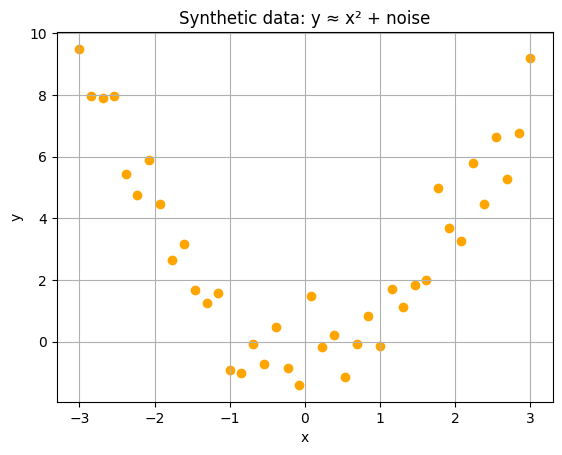

In [1]:

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
X = np.linspace(-3, 3, 40).reshape(-1,1)          # shape (40,1)
y = X.flatten()**2 + np.random.normal(0, 1, size=X.shape[0])

plt.scatter(X, y, c='orange')
plt.title("Synthetic data: y ≈ x² + noise")
plt.xlabel("x"); plt.ylabel("y"); plt.grid(); plt.show()


## 2️⃣ Fit linear regression (NumPy normal equation)

In [2]:

# Design matrix for linear: [1, x]
X_lin = np.hstack([np.ones_like(X), X])           # shape (40,2)
w_lin = np.linalg.lstsq(X_lin, y, rcond=None)[0]  # solves (XᵀX)w = Xᵀy

print("Linear weights:", w_lin)


Linear weights: [ 2.93520932 -0.1326777 ]


## 3️⃣ Fit quadratic regression via manual polynomial features

In [3]:

# Features: [1, x, x²]
X_quad = np.hstack([np.ones_like(X), X, X**2])
w_quad = np.linalg.lstsq(X_quad, y, rcond=None)[0]

print("Quadratic weights:", w_quad)


Quadratic weights: [-0.41108914 -0.1326777   1.06102146]


## 4️⃣ Visualise linear vs. quadratic fits

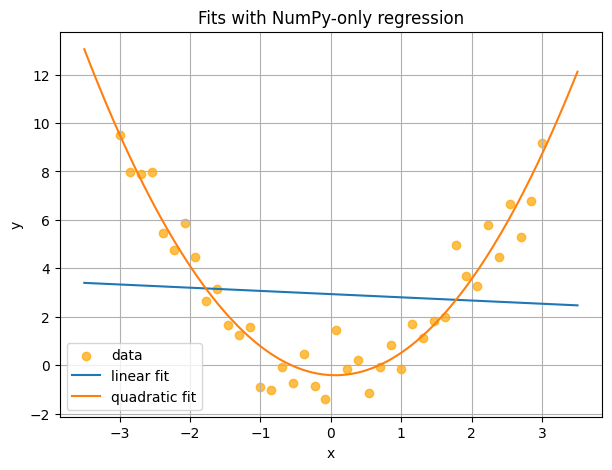

In [4]:

xx = np.linspace(-3.5, 3.5, 200).reshape(-1,1)
X_lin_pred = np.hstack([np.ones_like(xx), xx])
X_quad_pred = np.hstack([np.ones_like(xx), xx, xx**2])

plt.figure(figsize=(7,5))
plt.scatter(X, y, label='data', color='orange', alpha=0.7)
plt.plot(xx, X_lin_pred @ w_lin, label='linear fit')
plt.plot(xx, X_quad_pred @ w_quad, label='quadratic fit')
plt.title("Fits with NumPy-only regression")
plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.grid(); plt.show()


## 5️⃣ Feature‑space $(x, x^2)$ geometry & dot product

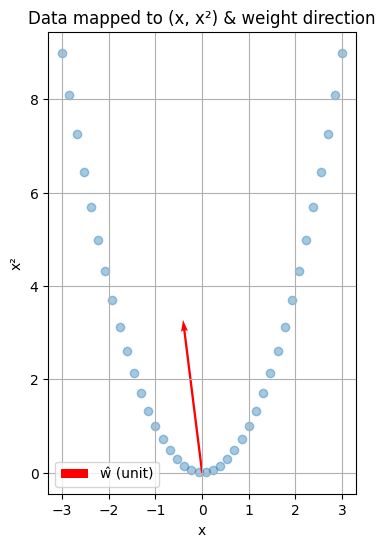

In [5]:

phi = np.hstack([X, X**2])            # shape (40,2)
w_vec = w_quad[1:]                    # skip bias, keep [w1, w2]
w_unit = w_vec / np.linalg.norm(w_vec)

import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.scatter(phi[:,0], phi[:,1], alpha=0.4)
plt.quiver(0,0,*w_unit, scale=2, color='red', label='ŵ (unit)')
plt.title("Data mapped to (x, x²) & weight direction")
plt.xlabel("x"); plt.ylabel("x²"); plt.grid(); plt.legend(); plt.gca().set_aspect('equal'); plt.show()


## 6️⃣ Dot‑product projection example (x = 2)

In [7]:

x_sample = 0.01
phi_sample = np.array([x_sample, x_sample**2])
proj_len = phi_sample @ w_unit
proj_vec = proj_len * w_unit

print("φ(2) =", phi_sample)
print("Unit weight vector", w_unit.round(3))
print("Projection length =", proj_len.round(3))

# Visualise projection
plt.figure(figsize=(6,6))
plt.scatter(phi[:,0], phi[:,1], alpha=0.3)
plt.quiver(0,0,*w_unit, color='red', label='ŵ')
plt.quiver(0,0,*phi_sample, color='green', label='φ(2)')
plt.quiver(0,0,*proj_vec, color='purple', linestyle='--', label='projection')
plt.title("Projection of φ(2) onto ŵ")
plt.xlabel("x"); plt.ylabel("x²"); plt.grid(); plt.legend(); plt.gca().set_aspect('equal'); plt.show()


φ(2) = [0.01   0.0001]
Unit weight vector [-0.124  0.992]
Projection length = -0.001


ValueError: At least one value in the dash list must be positive

<Figure size 600x600 with 1 Axes>